<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Clustering_KMeans_FCM_VIX_6_June_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip show matplotlib 

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: cycler, pyparsing, python-dateutil, kiwisolver, numpy
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


In [2]:
import matplotlib

In [3]:
# supresses future warnings
import warnings
warnings.simplefilter(action='ignore')

#import pandas library for df creation
import pandas as pd

#import the numpy library to use random package
import numpy as np
import math

#import the matplotlib library for plotting
import matplotlib.pyplot as plt

#set plt style
plt.style.use('seaborn-whitegrid')

#use the magic function to ensure plots render in a notebook
%matplotlib inline

#Import the seaborn library for plotting
import seaborn as sns

#for data scaling
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#for pca
from sklearn.decomposition import PCA

#importing necessary libraries for ward linkage and clustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_excel("/content/drive/MyDrive/PhD research/VIX_daily.xlsx", index_col='Date')

In [6]:
df

,Last Price
Date,
2022-04-20,21.19
2022-04-19,21.37
2022-04-18,22.17
2022-04-14,22.70
2022-04-13,21.82
...,...
1990-01-08,20.26
1990-01-05,20.11
1990-01-04,19.22


In [7]:
df.isnull().any()

Last Price    False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8136 entries, 2022-04-20 to 1990-01-02
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Last Price  8136 non-null   float64
dtypes: float64(1)
memory usage: 127.1 KB


In [11]:
len(df)

8136

In [12]:
#VIX_daily=VIX_daily.dropna()

In [13]:
#VIX_daily

In [14]:
#VIX_daily.isnull().any()

In [15]:
#VIX_daily=VIX_daily.dropna()

In [16]:
#VIX_daily

In [17]:
#VIX_daily['Date'] = (VIX_daily['Date'].apply(lambda x: float(x[0].replace(',', ''))))

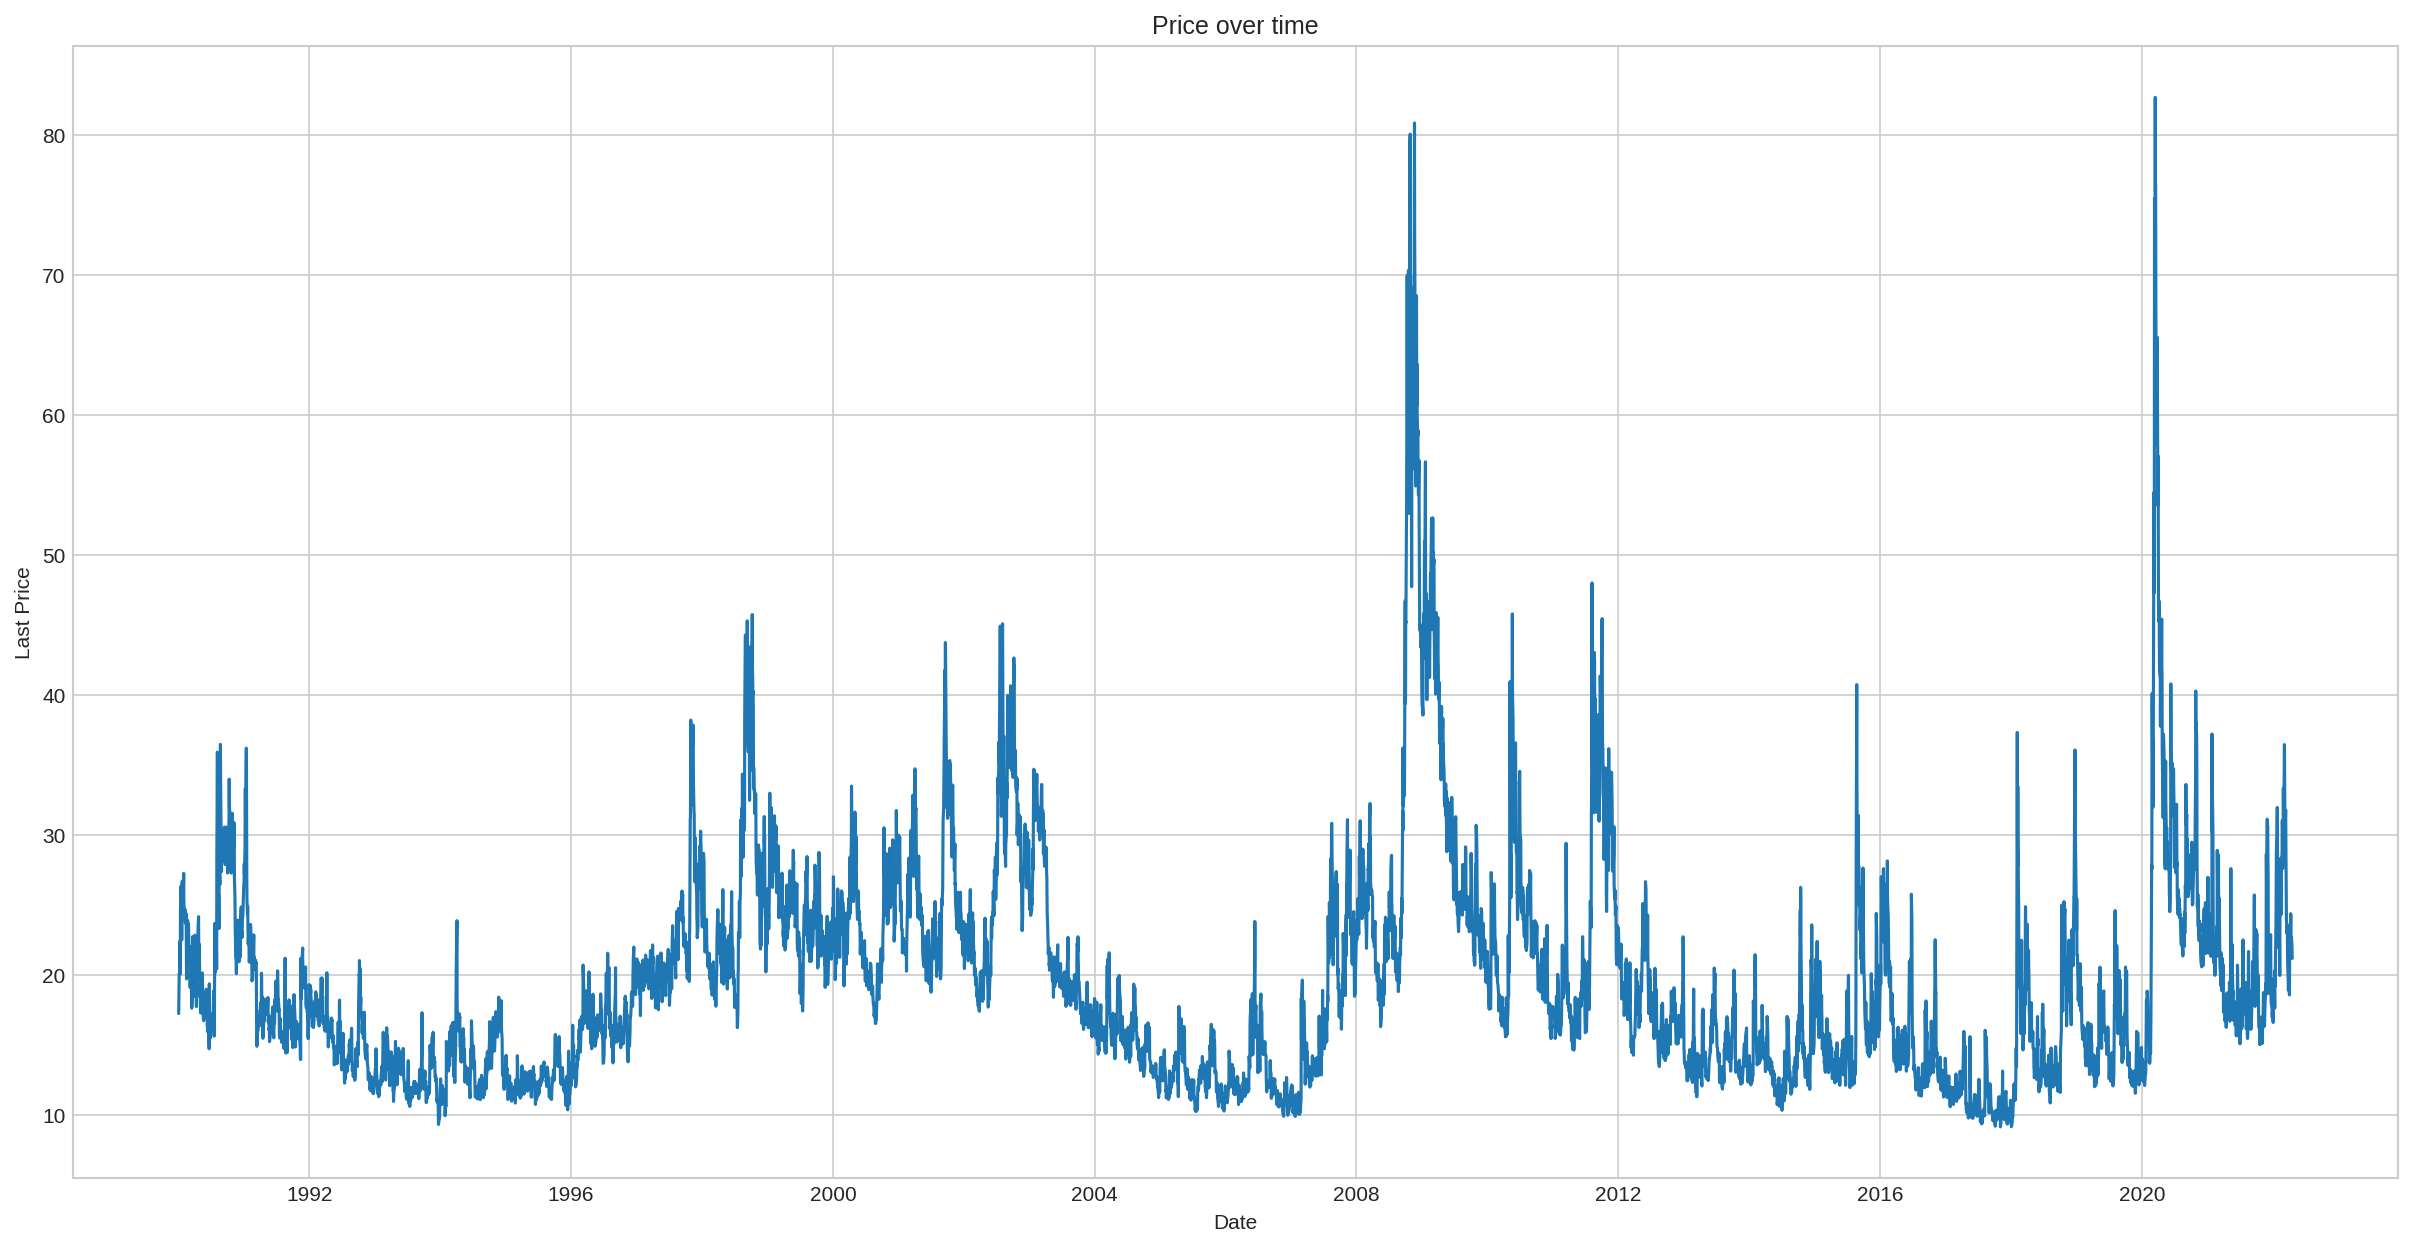

In [18]:
plt.figure(figsize=(20, 10), dpi=150) #plotting time series to check frequency and trend
plt.plot(df.index, df['Last Price'], color='tab:blue')
plt.gca().set(title='Price over time', 
xlabel='Date', ylabel='Last Price')
plt.show()

In [19]:
# importing Library
from sklearn.cluster import KMeans

#getting labels
kmean = KMeans()
kmean.fit(df)
labels=kmean.labels_

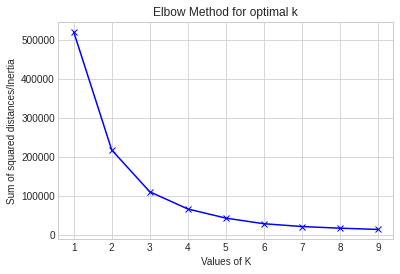

In [20]:
#elbow method
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method for optimal k')
plt.show()

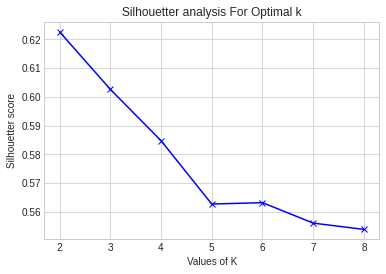

In [21]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

  #initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  cluster_labels = kmeans.labels_

  # silhouette score

  silhouette_avg.append(silhouette_score(df, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouetter score')
plt.title('Silhouetter analysis For Optimal k')
plt.show()  

In [22]:
# number of clusters 5
# PCA data with 5 clusters
clusterer = KMeans(n_clusters=5, random_state=42).fit(df)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df)
print(centers)

[[26.81939959]
 [19.69309811]
 [13.48929072]
 [62.16890411]
 [38.19894207]]


In [23]:
ps1 = pd.DataFrame(df)
ps1

,Last Price
Date,
2022-04-20,21.19
2022-04-19,21.37
2022-04-18,22.17
2022-04-14,22.70
2022-04-13,21.82
...,...
1990-01-08,20.26
1990-01-05,20.11
1990-01-04,19.22


In [24]:
centroids = clusterer.cluster_centers_
centroids[:]

array([[26.81939959],
       [19.69309811],
       [13.48929072],
       [62.16890411],
       [38.19894207]])

['blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'blue', 'blue', 'blue']


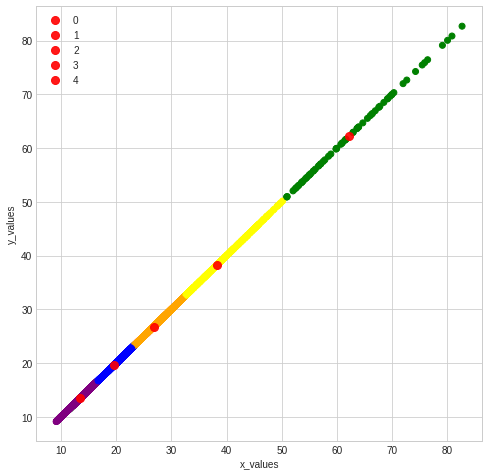

In [25]:
## Plotting the K mean Cluster
tocluster = pd.DataFrame(ps1)
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green','yellow']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster,tocluster,  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c, c, 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [26]:
VIX_raw = df['Last Price'].to_numpy()
VIX_raw = np.reshape(VIX_raw, [-1,1])

In [27]:
# copy the data and Normalise it
df_min_max_scaled = df['Last Price'].copy()

# apply normalization techniques on logged data
for i in df_min_max_scaled:
    df_min_max_scaled  = (df_min_max_scaled  - df_min_max_scaled .min()) / (df_min_max_scaled .max() - df_min_max_scaled .min())
#df_transform = StandardScaler.transform(VIX_raw)
# view normalized data
print(df_min_max_scaled)

Date
2022-04-20    0.163834
2022-04-19    0.166281
2022-04-18    0.177158
2022-04-14    0.184364
2022-04-13    0.172400
                ...   
1990-01-08    0.151190
1990-01-05    0.149150
1990-01-04    0.137050
1990-01-03    0.123046
1990-01-02    0.110129
Name: Last Price, Length: 8136, dtype: float64


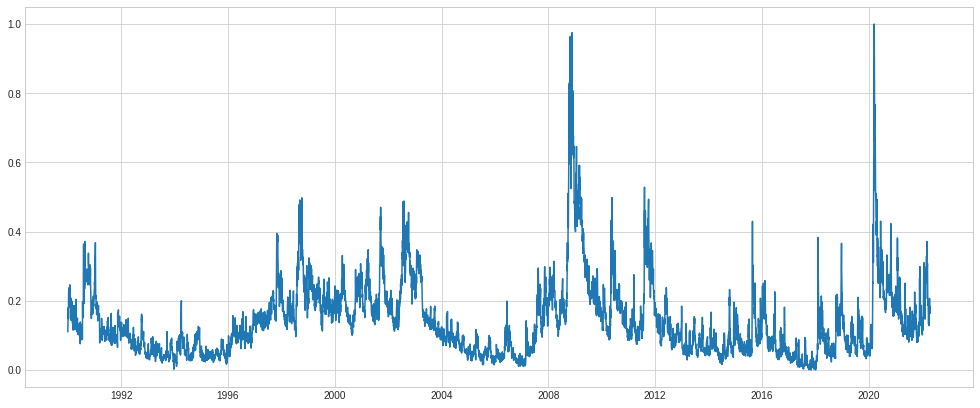

In [28]:
#plot
plt.figure(figsize=(17,7))
plt.plot( df.index, df_min_max_scaled )
plt.show()

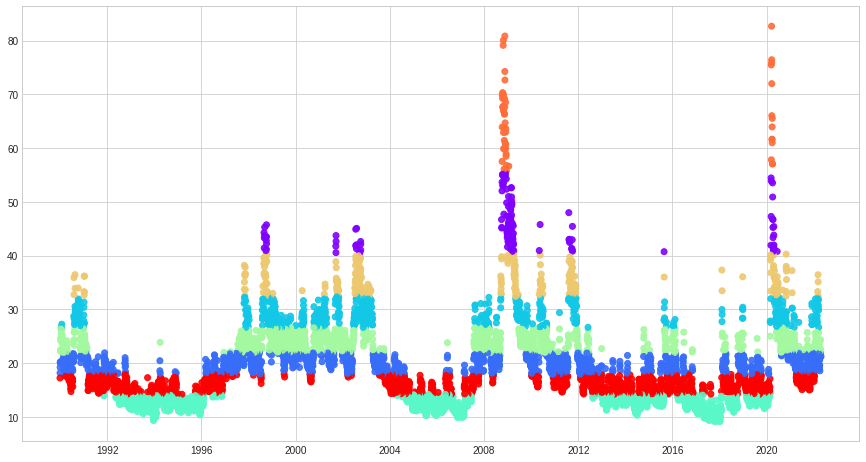

In [29]:
fig = plt.figure(figsize=(15,8))
plt.scatter(df.index,df, c=kmeans.labels_, alpha=0.9, cmap="rainbow")
plt.show()

['blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue']


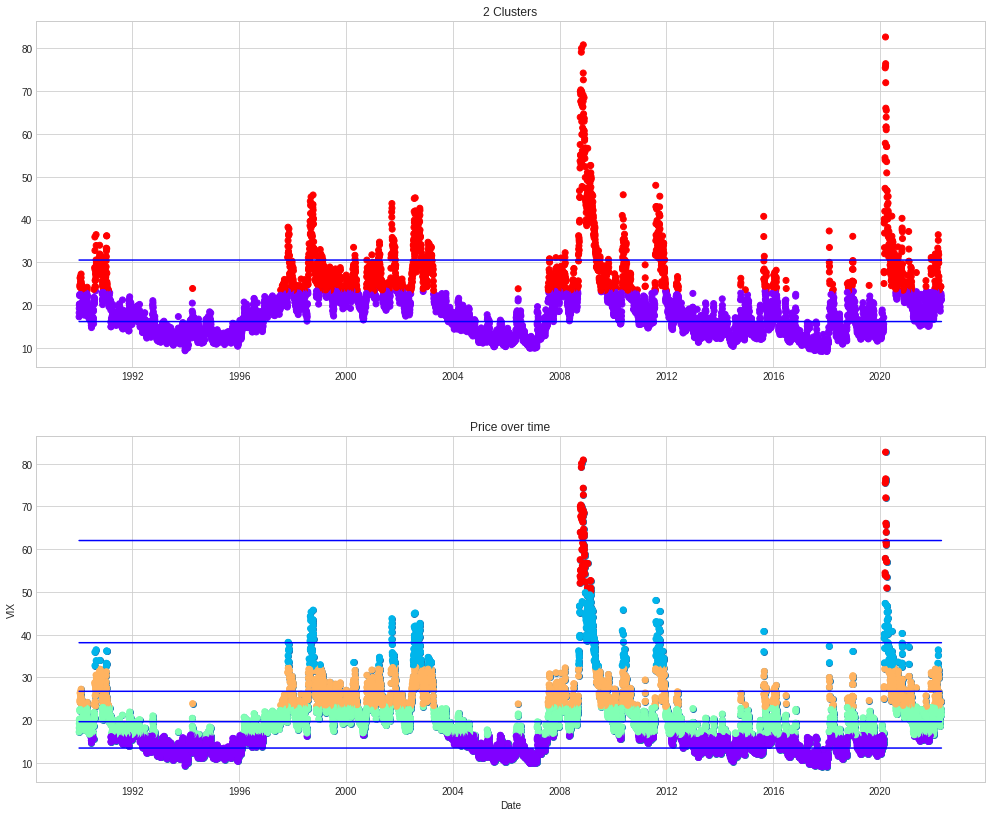

In [30]:
#Plot the best Clustering
k_best = [ 2, 5]
fig, axs = plt.subplots(len(k_best), 1)
#fig, axs = plt.subplots(2, 1)
fig.set_size_inches(17,7*len(k_best))
nsamples=8136
x=np.random.uniform(0,10,nsamples)
y=np.random.uniform(0,10,nsamples)
colors = ['red','blue','purple','green','yellow']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
colors={0:'r',1:'g',2:'b',3:'k'}
c=[colors[i] for i in np.round(np.random.uniform(0,3,nsamples),0)]

plt.scatter(df.index, df,  cmap='rainbow')
ind = 0
for kk in k_best:
  kmeans = KMeans(n_clusters=kk, random_state=0).fit(df)  
  axs[ind].scatter(df.index, df, c=kmeans.labels_ , cmap = 'rainbow')
  for centroid in kmeans.cluster_centers_:
    axs[ind].plot(df.index, np.ones_like(df.index, dtype = "float64")*(centroid), "b")
  axs[ind].set_title(str(kk)+" Clusters") 
  ind = ind + 1
plt.gca().set(title='Price over time', 
xlabel='Date', ylabel='VIX')
plt.show()


plt.show()

In [31]:
# Calculate Silhouette Score
score = silhouette_score(df,labels, metric='euclidean')
#Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.554


In [32]:
df1 = df.to_numpy()

In [33]:
!pip install pyfuzzyset
!pip install fuzzy-c-means


from fcmeans import FCM

my_model = FCM(n_clusters=5) #  use 5 clusters as an example
my_model.fit(df1) # X, numpy array, row:samples columns:features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
centers = my_model.centers
labels = my_model.predict(df1)

['green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green', 'yellow']


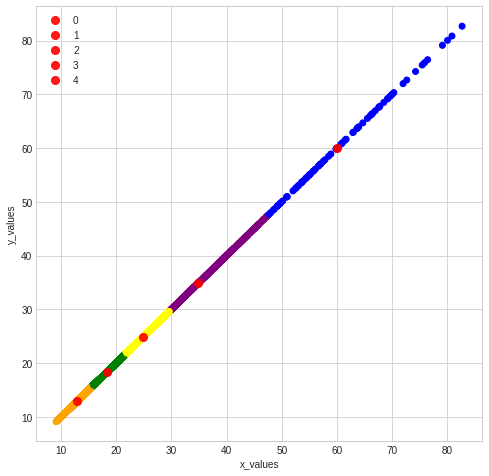

In [35]:
# plotting the Fuzzy C mean Cluster
tocluster = pd.DataFrame(df1)
fig = plt.figure(figsize=(8,8))
colors = ['orange', 'blue', 'purple', 'green', 'yellow']
colored = [colors[k] for k in labels]
print (colored[0:10])
plt.scatter(tocluster, tocluster, color=colored)
for ci, c in enumerate(centers):
  plt.plot(c, c, 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()


['blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue']


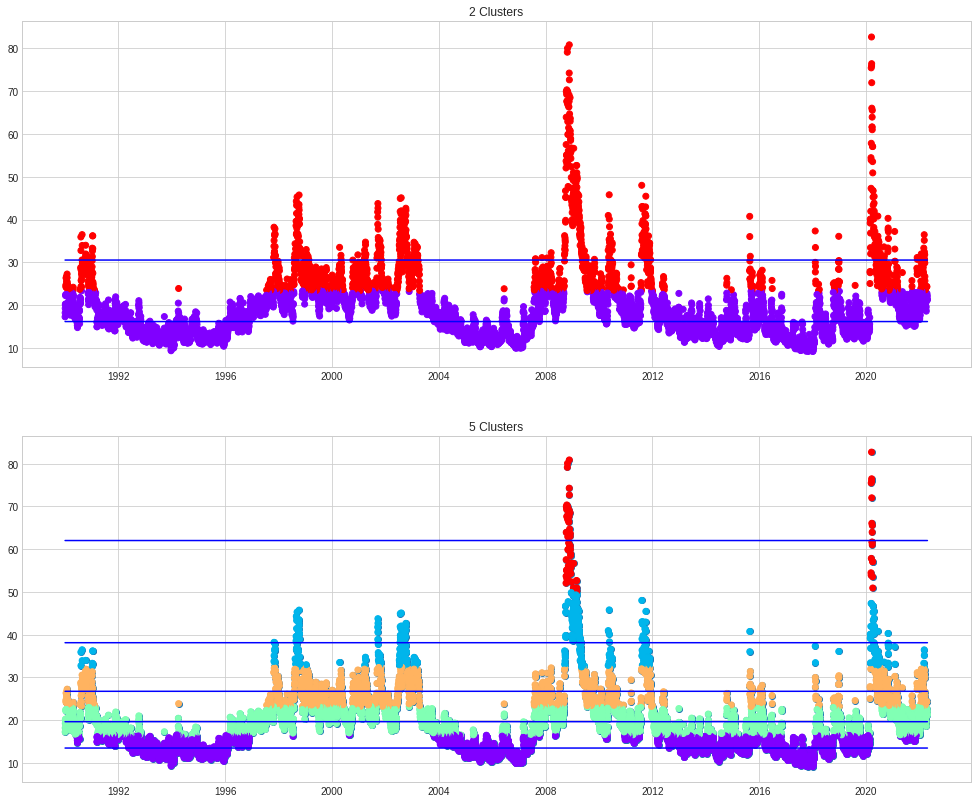

In [36]:
#Plot the best Clustering
k_best = [ 2, 5]
fig, axs = plt.subplots(len(k_best), 1)
fig.set_size_inches(17,7*len(k_best))
nsamples=8136
x=np.random.uniform(0,10,nsamples)
y=np.random.uniform(0,10,nsamples)
colors = ['red','blue','purple','green','yellow']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
colors={0:'r',1:'g',2:'b',3:'k'}
c=[colors[i] for i in np.round(np.random.uniform(0,3,nsamples),0)]

plt.scatter(df.index, df1,  cmap = 'rainbow')
ind = 0
for kk in k_best:
  kmeans = KMeans(n_clusters=kk, random_state=0).fit(df1)  
  axs[ind].scatter(df.index, df1, c=kmeans.labels_, cmap='rainbow')
  for centroid in kmeans.cluster_centers_:
    axs[ind].plot(df.index, np.ones_like(df.index, dtype = "float64")*(centroid), "b")
  axs[ind].set_title(str(kk)+" Clusters") 
  ind = ind + 1

plt.show()

In [37]:
# Calculate Silhouetter Score
score = silhouette_score(df1, labels, metric='euclidean')
#print the score
print('Silhoutter Score: %.3f' %score)

Silhoutter Score: 0.555


In [38]:
#Initialize variable
x_raw = df['Last Price'].to_numpy()
x_raw = np.reshape(x_raw, [-1,1])

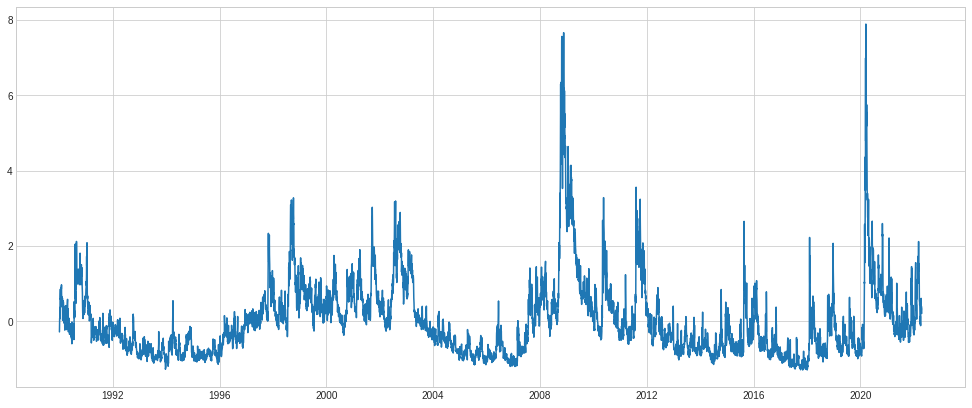

In [39]:
#Scaling
scaler = StandardScaler().fit(x_raw)
scaler
x_scaled = scaler.transform(x_raw)
#Plot
plt.figure(figsize=(17,7))
plt.plot( df.index, x_scaled)
plt.show()

In [47]:
#Transition matrix
Trans_df = df.copy(deep = True)
Trans_df["Old Label_t"] = kmeans.labels_
Trans_df["New Label_t"] = np.zeros_like(Trans_df["Old Label_t"])
Dict_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns = ["Centroids"])
Dict_df.sort_values(by=['Centroids'], inplace=True)

for ii in Trans_df.index:
  Trans_df["New Label_t"].at[ii] = Dict_df.index[Trans_df["Old Label_t"][ii]]




Trans_df["Label_t+1"] = Trans_df["New Label_t"].shift(periods=-1)
unique = np.unique(Trans_df["New Label_t"])
Trans_prob = np.zeros([len(unique),len(unique)])
for u1 in unique:
  #Tot_row = np.count_nonzero(Trans_df["New Label_t"] == u1)
  for u2 in unique:
    Trans_prob[u1, u2] = np.count_nonzero(np.logical_and(Trans_df["New Label_t"] == u1, Trans_df["Label_t+1"] == u2))#/Tot_row

Trans_m = pd.DataFrame( data = Trans_prob, columns = unique)
print ("Row = start cluster; Column = end cluster")
Trans_m

Row = start cluster; Column = end cluster


,0,1,2,3,4
0,3326.0,0.0,0.0,219.0,0.0
1,1.0,1231.0,67.0,171.0,0.0
2,0.0,65.0,324.0,2.0,9.0
3,218.0,174.0,0.0,2254.0,0.0
4,0.0,0.0,9.0,0.0,65.0


In [50]:
Trans_df[np.logical_and(Trans_df["New Label_t"] == 0, Trans_df["Label_t+1"] == 2)]

,Last Price,Old Label_t,New Label_t,Label_t+1
Date,,,,
